In [1]:
%env JAX_PLATFORMS=cpu
%env JAX_ENABLE_X64=True

env: JAX_PLATFORMS=cpu
env: JAX_ENABLE_X64=True


In [2]:
import jax.numpy as jnp
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

from single import plot_dynamics, plot_gradients, plot_spiketimes, run
from spikegd.qif import QIFNeuron
from spikegd.utils.plotting import cm2inch, panel_label

In [3]:
plt.style.use("spikegd.utils.plotstyle")

# Run experiments

In [4]:
config_qif = {
    "seed": 3,
    # Neuron
    "tau": 1.0,
    "eps": 1e-6,
    "alpha": 10.0,
    # Network
    "Nin": 22,  # Input neurons
    "Ntrain": 2,  # Input neurons with trainable parameters
    # Trial
    "T": 10.0,
    "K": 25,  # Maximal number of simulated ordinary spikes
    "dt": 0.01,  # Step size used to compute state traces
    # Training
    "t_targets": jnp.array([2.5, 7.5]),  # Target output spike times
    "Ntrial": 3000,
    "lr": 0.1,
}


def run_qif(config: dict) -> tuple:
    """
    Wrapper to train a QIF neuron with the given configuration.

    See docstring of `run` and article for more information.
    """
    tau, eps, alpha = config["tau"], config["eps"], config["alpha"]
    neuron = QIFNeuron(tau, eps, alpha)
    return run(neuron, config)

In [5]:
metrics, examples = run_qif(config_qif)

# Plot results

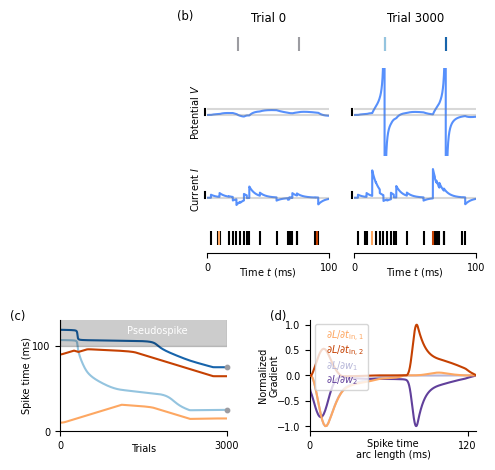

In [6]:
### Figure
fig = plt.figure(figsize=cm2inch(1.5 * 8.6, 1.5 * 8))
gs = gridspec.GridSpec(
    2,
    1,
    figure=fig,
    height_ratios=[2, 1],
    hspace=0.4,
    top=0.94,
    bottom=0.09,
    left=0.15,
    right=0.97,
)
gs_top = gridspec.GridSpecFromSubplotSpec(1, 6, subplot_spec=gs[0, 0], wspace=0.5)
gs_bottom = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[1, 0], wspace=0.5)

### Dynamics before learning
g = gridspec.GridSpecFromSubplotSpec(12, 1, subplot_spec=gs_top[2:4], hspace=1.0)
plot_dynamics(fig, g, examples, 0, config_qif)

### Dynamics after learning
g = gridspec.GridSpecFromSubplotSpec(12, 1, subplot_spec=gs_top[4:], hspace=1.0)
plot_dynamics(fig, g, examples, 1, config_qif, labels=False)

### Spike times
ax = fig.add_subplot(gs_bottom[0])
plot_spiketimes(ax, metrics, config_qif)
panel_label(fig, ax, "(c)", x=-0.5)

### Gradients
ax = fig.add_subplot(gs_bottom[1])
plot_gradients(ax, metrics, config_qif)
panel_label(fig, ax, "(d)", x=-0.4)

plt.show()